# Importations

In [262]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [263]:
def reference(x):
  """
  Densité de référence à estimer
  """
  return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)

---

# Partie I

## Question 1

In [264]:
def K1(x):
  """
  Noyau uniforme (fonction porte)
  """
  return 0 if abs(x)>1 else 0.5

def K2(x):
  """
  Noyau triangle
  """
  return 0 if abs(x)>1 else 1 - abs(x)

def K3(x):
  """
  Noyau d'Epanechnikov
  """
  return 0 if abs(x)>1 else (3/4)*(1-x**2)

def K4(x):
  """
  Noyau gaussien
  """
  return 1/np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

## Question 2

In [265]:
def allPlotK(pas: float, xmin: float, xmax: float, col1, col2, col3, col4) -> None:
  """
  Trace l'ensemble des noyaux sur l'intervalle défini.
  :param float pas: Pas entre deux points du graphique
  :param float xmin : Valeur de départ du tracé des noyaux
  :param float xmax: Valeur de fin du tracé des noyaux
  :param col1: Couleur du noyau uniforme
  :param col2: Couleur du noyau triangle
  :param col3: Couleur du noyau d'Epanechnikov
  :param col4: Couleur du noyau gaussien
  """
  
  x = np.linspace(xmin, xmax, int((xmax-xmin)/pas))
  y1, y2, y3, y4 = [], [], [], []
  for i in x:
    y1.append(K1(i))
    y2.append(K2(i))
    y3.append(K3(i))
    y4.append(K4(i))
  plt.plot(x, y1, color=col1, label="Noyau uniforme")
  plt.plot(x, y2, color=col2, label="Noyau triangle")
  plt.plot(x, y3, color=col3, label="Noyau d'Epanechnikov")
  plt.plot(x, y4, color=col4, label="Noyau gaussien")
  plt.legend(loc='upper right')
  plt.ylim([0, 1.5])
  plt.title(f"Tracé des différents noyaux sur [{xmin}, {xmax}]")

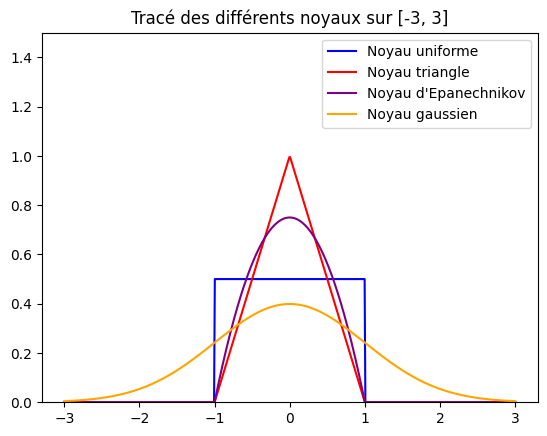

In [266]:
allPlotK(0.01, -3, 3, "blue", "red", "purple", "orange")

> On trouve bien les tracés que nous avions travaillé en cours ainsi qu'en TD. L'intégrale de chacune de ces fonctions (soit l'aire sous la courbe) vaut bien 1, comme nous l'avons vu pendant la préparation de ce TP.

## Question 3

[ 0.09924718 -0.20369551 -1.95335051 -0.04686131 -0.1859718   0.35653621
 -0.06824712  1.05883588 -0.97624259  0.89152991 -1.36903699 -0.92957478
 -1.4810699  -1.9214892  -0.04164015  1.14926855 -0.55549048 -1.06699763
 -0.36177845 -0.9053982  -0.56271293 -1.71734536 -0.05353737  0.38636778
  0.38962454 -1.07927453  0.05019319 -0.24674587  0.10670465  1.04822933
  0.65077636 -1.46904649 -2.10750142 -0.3597159   0.23353989  0.33456132
 -0.15059894 -0.6729046   1.45853223  0.29339462  0.68697846  0.43126603
 -1.28952025 -0.46453071 -0.65266133 -0.31329905  0.16818536 -0.56124662
  2.05713644 -0.06073758 -1.37967908 -1.84019782 -0.17560658 -1.01670549
  0.48550685 -0.25109832  0.41520746 -0.33089616  0.48767574 -0.43195518
  1.16500582 -1.36493423  0.46941622 -0.61567747  0.49838758  0.69765128
 -1.04698639 -1.65921512 -1.17862224  1.36350163  0.68015303  1.27495913
 -0.32260058  0.99826126  1.90436075 -0.09075994 -0.39396356  0.16789204
 -0.51889601  0.15796405 -0.2995031  -0.47640585 -1

(array([ 2.,  1.,  2.,  3.,  0.,  5.,  1.,  4.,  4.,  3.,  2.,  5.,  5.,
        10.,  6.,  7.,  6.,  6.,  9.,  1.,  6.,  1.,  3.,  2.,  1.,  2.,
         1.,  0.,  1.,  1.]),
 array([-2.21927758, -2.07673045, -1.93418331, -1.79163618, -1.64908905,
        -1.50654191, -1.36399478, -1.22144764, -1.07890051, -0.93635338,
        -0.79380624, -0.65125911, -0.50871197, -0.36616484, -0.2236177 ,
        -0.08107057,  0.06147656,  0.2040237 ,  0.34657083,  0.48911797,
         0.6316651 ,  0.77421223,  0.91675937,  1.0593065 ,  1.20185364,
         1.34440077,  1.48694791,  1.62949504,  1.77204217,  1.91458931,
         2.05713644]),
 <BarContainer object of 30 artists>)

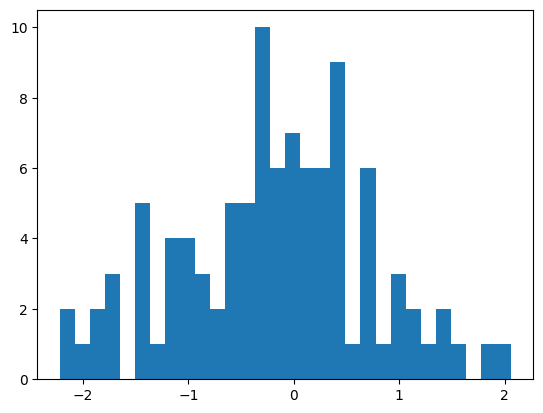

In [267]:
n = 100
realisation_X = norm.rvs(0, 1, n)

print(realisation_X)
plt.hist(realisation_X, bins=30)

> Grâce à cet histogramme, on remarque que la liste realisation_X suit bien une loi normale centrée réduite lorsque l'on prend une grande valeur de n.

## Question 4

In [268]:
def fchapeau(funct, h, x, n, X=realisation_X):
  """
  Estimation de la densite f, de la gaussienne standard.

  :param funct: noyau
  :param h: fenetre
  :param x: point d'application de fchapeau
  :param n: nombre d'échantillons
  :param X: realisation
  """
  result=float(0)
  for i in range(1, n):
    result+=funct((x-X[i])/h)
  return result/(n*h)

## Question 5 & 6 & 7


Afin d'éviter de coder deux fonctions qui ont exactement le même objectif, nous n'allons en coder qu'une nomée **allPlotfchapeau**, qui prends deux arguments de plus : **h** et **n**.

Ces deux argument sont <font color=red> optionnels </font>, ainsi nous devons leurs assigner une valeur par défault.
Par défault, nous prenons alors les valers suivants :
n = 100
h = 2
Car ce sont les valeurs que nous désirons dans un premier temps.

Ainsi, si nous voulons appeler la fonction "allPlotfchapeau" pour la question 5, il nous suffit d'écrire :

```python
allPlotfChapeauh(xmin, xmax, col1, col2, col3, colref)
```

et les valeurs **h=2** et **n=100** seront automatiquement assignés.

In [269]:
def allPlotfChapeauh(xmin, xmax, pas, col1, col2, col3, col4, colref, h=2, n=100, X=realisation_X):
  """
  Trace l'ensemble des courbes de f chapeau pour un intervalle donnée
  """
  x = np.linspace(xmin, xmax, int((xmax-xmin)/pas))
  y1, y2, y3, y4, yref = [], [], [], [], []
  if len(X)!=n:
    X = norm.rvs(0, 1, n)
  for i in x:
    y1.append(fchapeau(K1, h, i, n, X))
    y2.append(fchapeau(K2, h, i, n, X))
    y3.append(fchapeau(K3, h, i, n, X))
    y4.append(fchapeau(K4, h, i, n, X))
    yref.append(reference(i))
  plt.figure().set_figheight(10)
  plt.figure().set_figwidth(6)
  plt.plot(x, y1, color=col1, label="Estimateur de la densité du noyau uniforme")
  plt.plot(x, y2, color=col2, label="Estimateur de la densité du noyau triangle")
  plt.plot(x, y3, color=col3, label="Estimateur de la densité du noyau d'Epanechnikov")
  plt.plot(x, y4, color=col4, label="Estimateur de la densité du noyau gaussien")
  plt.plot(x, yref, color=colref, label="Fonction de référence")
  plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
  plt.title(f"Estimateurs des noyaux sur [{xmin}, {xmax}], avec (n,h)=({n},{h})")

<Figure size 640x1000 with 0 Axes>

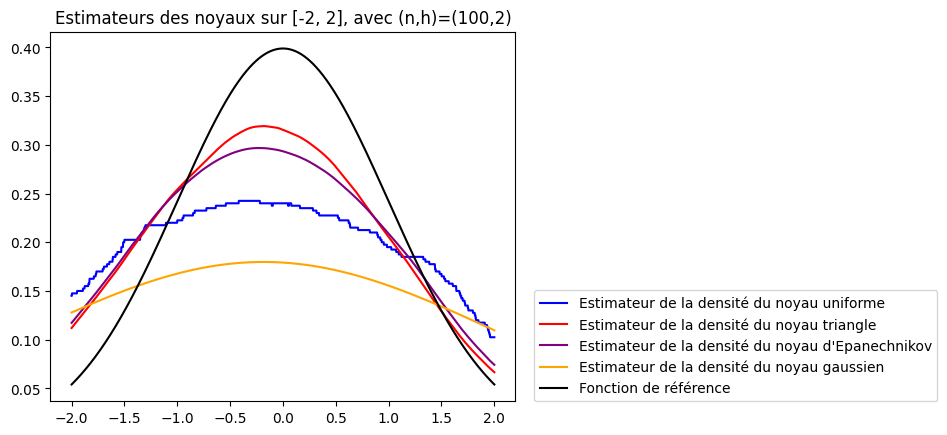

In [270]:
allPlotfChapeauh(-2, 2, 0.001, "blue", "red", "purple", "orange", "black")

> On remarque que la forme générale est bien la même cependant l'amplitude à estimer n'est pas encore la bonne.
>
>On remarque aussi que l'estimateutr de la densité du noyau uniforme est la seule à avoir un aspect aussi discontinu. C'est un résultat que l'on observe aussi en cours et qui provient du fait que la fonction porte est discontinue et constante sur [-1, 1].

## Question 6

<Figure size 640x1000 with 0 Axes>

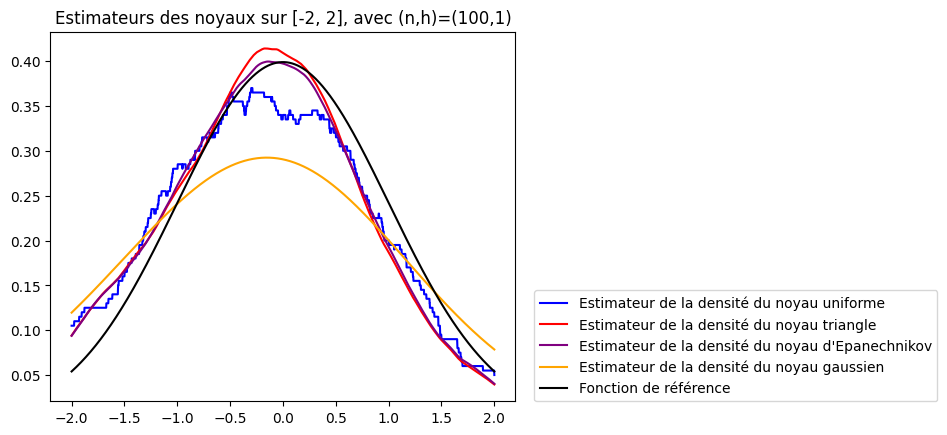

In [271]:
allPlotfChapeauh(-2, 2, 0.001, "blue", "red", "purple", "orange", "black", h=1)

> On remarque que la forme générale est bien plus proche pour l'ensemble des courbes en prenant une fenêtre h égale à 1.

## Question 7

<Figure size 640x1000 with 0 Axes>

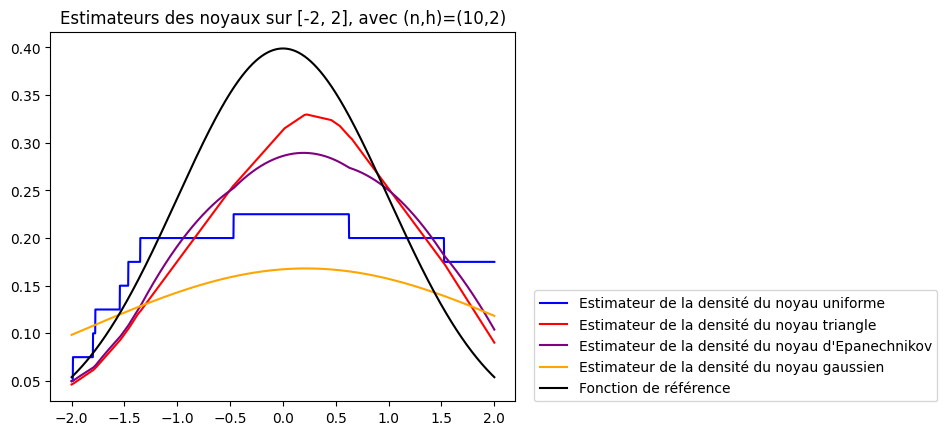

In [272]:
allPlotfChapeauh(-2, 2, 0.001, "blue", "red", "purple", "orange", "black", h=2, n=10)

<Figure size 640x1000 with 0 Axes>

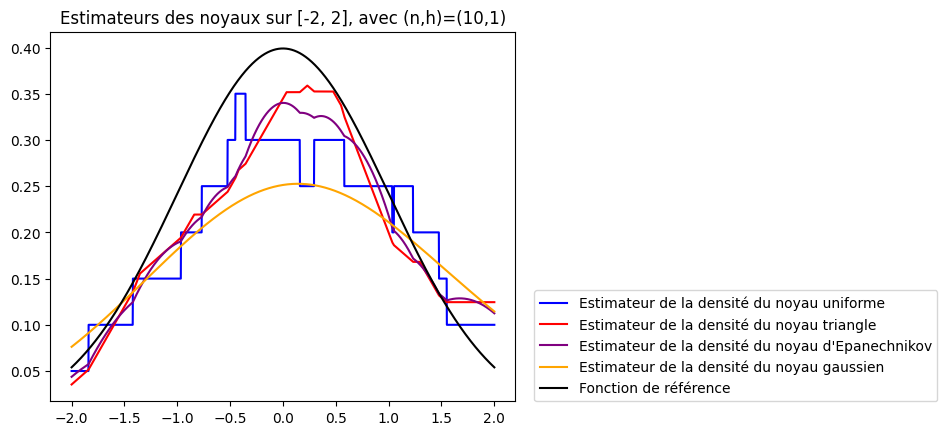

In [273]:
allPlotfChapeauh(-2, 2, 0.001, "blue", "red", "purple", "orange", "black", h=1, n=10)

<Figure size 640x1000 with 0 Axes>

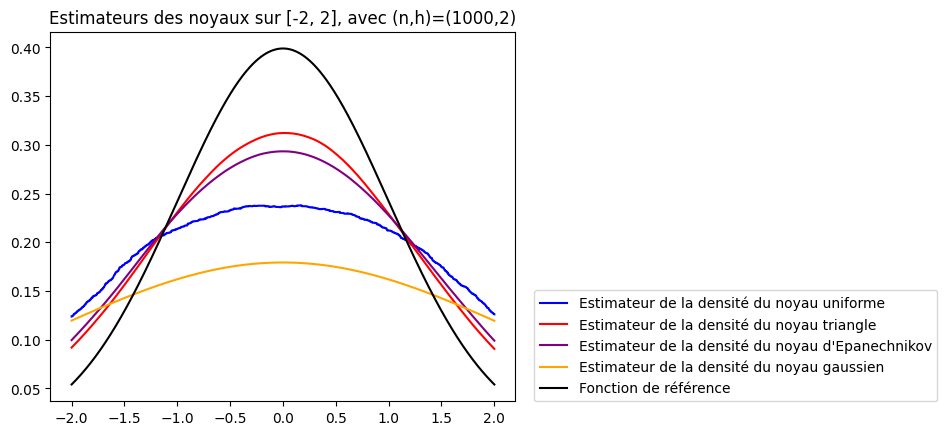

In [274]:
allPlotfChapeauh(-2, 2, 0.001, "blue", "red", "purple", "orange", "black", h=2, n=1000)

<Figure size 640x1000 with 0 Axes>

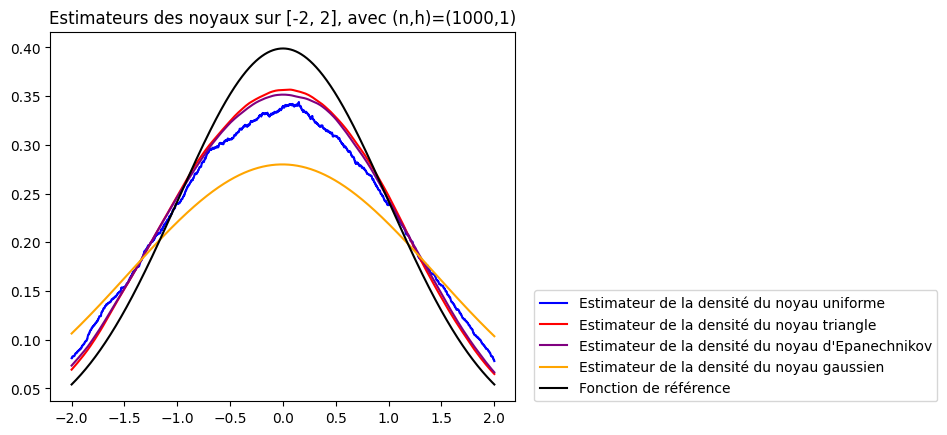

In [275]:
allPlotfChapeauh(-2, 2, 0.001, "blue", "red", "purple", "orange", "black", h=1, n=1000)

> On peut déduire deux points de ces différents affichages :
>
> *   Plus la valeur de n est grande, plus la courbe est lisse. C'est assez cohérent dans le domaine des statistiques : plus le nombres d'échantillons est grand, plus on se rapproche de la fonction / de la valeur à estimer.
*   Lorsque h est égal à 1, l'amplitude est plus proche de celle attendue, bien qu'elle ne soit toujours pas la bonne. Nous allons voir par la suite que la valeur de la fenêtre à prendre est propre à chaque noyau statistique.



## Question 8

In [276]:
def SCE(funct, h, f=reference, n=100, X=realisation_X):
  """
  Calcule et renvoie l'erreur quadratique d'une fonction

  :param funct: Noyau dont on veut calculer le SCE
  :param h: Fenêtre de calcul
  :param f: Fonction densité de référence
  :param n: nombre d'échantillons
  :param X: réalisation
  """
  somme = 0
  for i in range(501):
    ti = -5 + (10*i)/500
    somme += (fchapeau(funct, h, ti, n) - f(ti))**2
  return somme

## Question 9

In [277]:
def leMeilleurh(funct, f=reference, n=100, X=realisation_X):
  """
  Détermine la meilleure valeur de la fenetre pour estimer une fonction, selon un
  noyau donné.

  :param funct: Noyau dont on veut connaître le h optimal.
  """
  sce = [SCE(funct, 1/100, f, n, X)]
  min = sce[0]
  index = 0
  for h in range(2, 201):
    sce.append(SCE(funct, h/100, f, n, X))
    if sce[-1]<min:
      min = sce[-1]
      index = h
  return index/100

In [278]:
print(f"Le meilleur h pour le noyau uniforme est : {leMeilleurh(K1)}")
print(f"Le meilleur h pour le noyau triangle est : {leMeilleurh(K2)}")
print(f"Le meilleur h pour le noyau d'Epanechnikov est : {leMeilleurh(K3)}")
print(f"Le meilleur h pour le noyau gaussien est : {leMeilleurh(K4)}")

Le meilleur h pour le noyau uniforme est : 0.82
Le meilleur h pour le noyau triangle est : 1.18
Le meilleur h pour le noyau d'Epanechnikov est : 1.06
Le meilleur h pour le noyau gaussien est : 0.49


> Nous remarquons ici que pour chaque noyau, 1 était bien une fenêtre plus proche que 2 de la valeur optimale. Nous pouvons désormais calculer les différentes valeurs des h optimaux, nous pouvons ainsi tracer les différentes estimations pour les h optimaux respectifs.

## Question 10

In [279]:
def allPlotfChapeauhOptimal(xmin, xmax, pas, col1, col2, col3, col4, colref, n=100, X=realisation_X):
  """
  Trace l'ensemble des f chapeau pour la valeur optimal de leurs h trouvé précédemment.
  """
  meilleurhK1 = leMeilleurh(K1)
  meilleurhK2 = leMeilleurh(K2)
  meilleurhK3 = leMeilleurh(K3)
  meilleurhK4 = leMeilleurh(K4)
  
  x = np.linspace(xmin, xmax, int((xmax-xmin)/pas))
  y1, y2, y3, y4, yref = [], [], [], [], []
  if len(X)!=n:
    X = norm.rvs(0, 1, n)
  for i in x:
    y1.append(fchapeau(K1, meilleurhK1, i, n, X))
    y2.append(fchapeau(K2, meilleurhK2, i, n, X))
    y3.append(fchapeau(K3, meilleurhK3, i, n, X))
    y4.append(fchapeau(K4, meilleurhK4, i, n, X))
    yref.append(reference(i))
  plt.figure().set_figheight(10)
  plt.figure().set_figwidth(6)
  plt.plot(x, y1, color=col1, label="Estimateur de la densité du noyau uniforme")
  plt.plot(x, y2, color=col2, label="Estimateur de la densité du noyau triangle")
  plt.plot(x, y3, color=col3, label="Estimateur de la densité du noyau d'Epanechnikov")
  plt.plot(x, y4, color=col4, label="Estimateur de la densité du noyau gaussien")
  plt.plot(x, yref, color=colref, label="Fonction de référence")
  plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
  plt.title(f"Estimateurs des noyaux sur [{xmin}, {xmax}] avec la meilleur fenêtre")

<Figure size 640x1000 with 0 Axes>

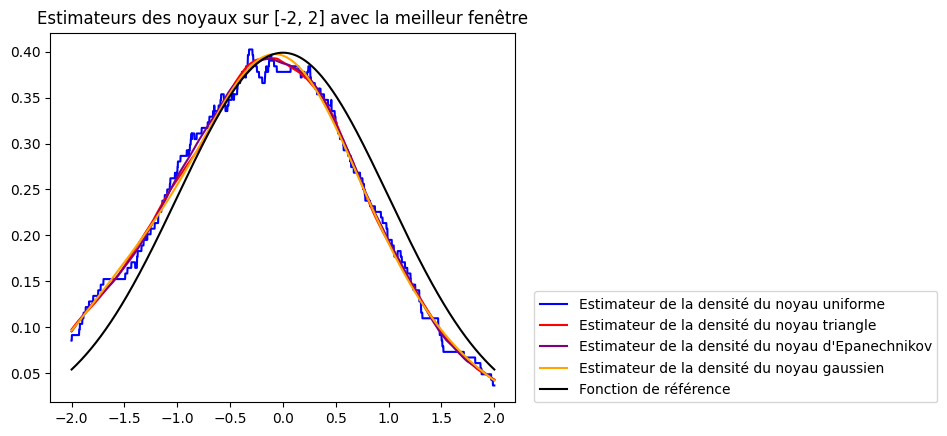

In [280]:
allPlotfChapeauhOptimal(-2, 2, 0.001, "blue", "red", "purple", "orange", "black")

> En prenant seulement 100 échantillons, mais les valeurs optimales de h, nous avons des estimations qui sont vraiment très proche de la fonction de référence. Nous pouvons faire le même tracé pour n=1000 et voir comment les courbes s'en rapprochent encore plus :

<Figure size 640x1000 with 0 Axes>

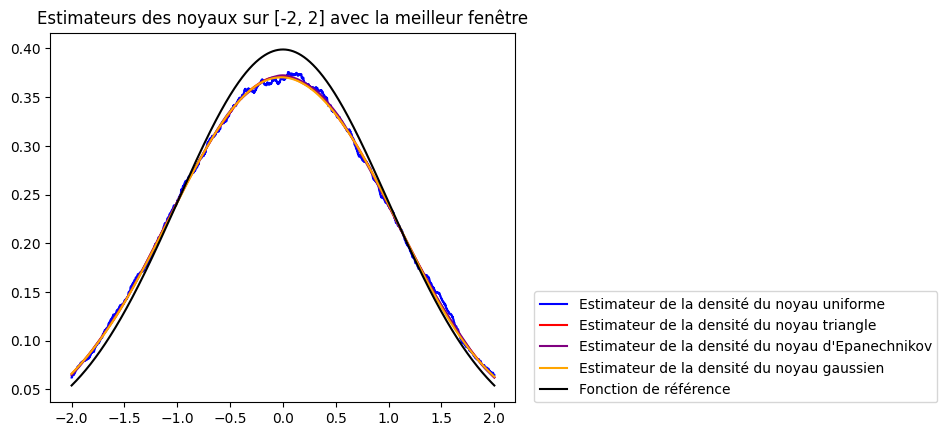

In [281]:
allPlotfChapeauhOptimal(-2, 2, 0.001, "blue", "red", "purple", "orange", "black", n=1000)

> En prenant n=1000, nous obtenons des tracés plus réguliers et qui sont presques tous les mêmes. Nous remarquons que l'estimation n'est pas non plus parfaite, car il y a hne légère différence d'amplitude qui se crée.
>
> Les courbes sont bien toutes centrées en 0 et leurs variances sont bien les mêmes car la forme globale est celle de la fonction de référence.

# Partie II

In [282]:
def estimationdensite(N,h,mu1,sigma1,mu2,sigma2):
  """
  Trace l'estimation de la densité pour le noyau gaussien.
  """
  # générer l'échantillon à partir de deux lois normales
  X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                      np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

  # préparer les points où on calculera la densité
  X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

  # préparation de l'affichage de la vraie densité, qui est celle à partir
  # de laquelle les données ont été générées (voir plus haut)
  # la pondération des lois dans la somme est la pondération des lois
  # dans l'échantillon généré (voir plus haut)
  true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

  # estimation de densité par noyaux gaussiens
  kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X)   


  # calcul de la densité pour les données de X_plot
  density = np.exp(kde.score_samples(X_plot))

  # affichage : vraie densité et estimation
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
  ax.plot(X_plot[:,0], density, '-', label="Estimation")
  ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
  ax.legend(loc='upper left')
  plt.title(f"Estimation de la denstité avec N={N}, h={h}, mu1={mu1}, sigma1={sigma1}, mu2={mu2}, sigma2={sigma2}")
  plt.show()           

In [283]:
def estimationdensite2(N,h,mu1,sigma1,mu2,sigma2):
  """
  Trace l'estimation de la densité pour le noyau d'Epanechnikov.
  """
  # générer l'échantillon à partir de deux lois normales
  X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                      np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

  # préparer les points où on calculera la densité
  X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

  # préparation de l'affichage de la vraie densité, qui est celle à partir
  # de laquelle les données ont été générées (voir plus haut)
  # la pondération des lois dans la somme est la pondération des lois
  # dans l'échantillon généré (voir plus haut)
  true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

  # estimation de densité par noyaux d'epanechnikov
  kde = KernelDensity(kernel='epanechnikov', bandwidth=h).fit(X)   


  # calcul de la densité pour les données de X_plot
  density = np.exp(kde.score_samples(X_plot))

  # affichage : vraie densité et estimation
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
  ax.plot(X_plot[:,0], density, '-', label="Estimation")
  ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
  ax.legend(loc='upper left')
  plt.show()

## Question 1

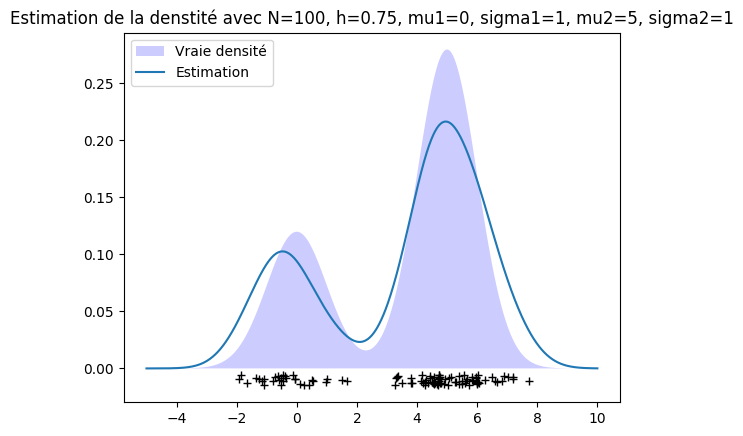

In [284]:
estimationdensite(N=100, h=0.75, mu1=0, sigma1=1, mu2=5, sigma2=1)

> L'estmation de la densité du noyau Gaussien à une forme proche de la densité réelle. On remarque que celle-ci est légèrement décallée notamment en 5 (à cause de l'influence de la gaussienne centrée en 0) et que l'amplitude n'est pas aussi élevée - il y a trop de valeurs dans le creu. Cependant la forme générale est tout de même reconnaissable.

## Question 2

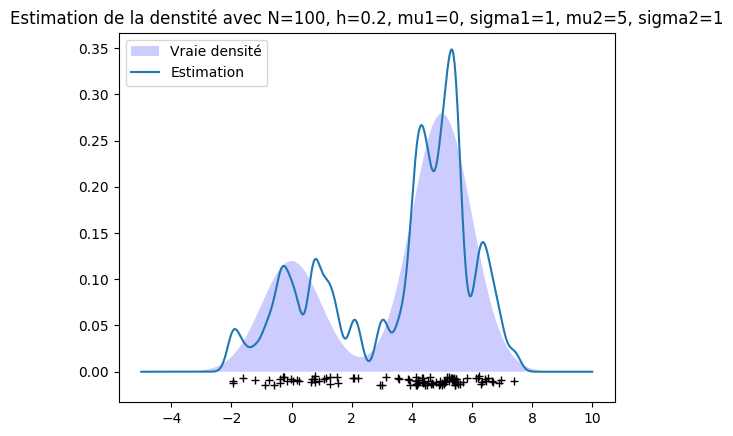

In [294]:
estimationdensite(N=100, h=0.2, mu1=0, sigma1=1, mu2=5, sigma2=1)

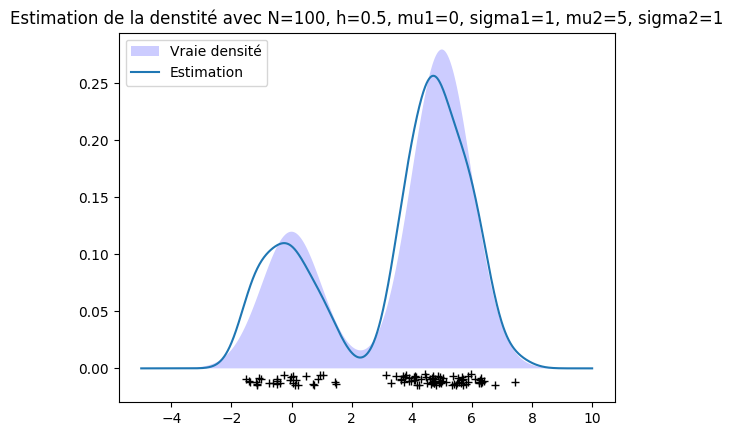

In [295]:
estimationdensite(N=100, h=0.5, mu1=0, sigma1=1, mu2=5, sigma2=1)

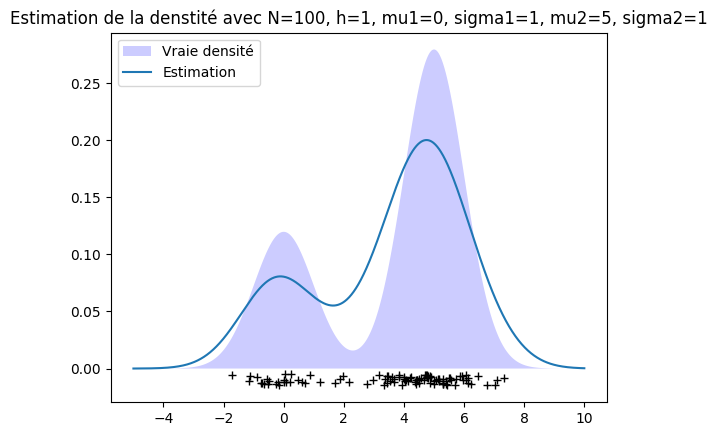

In [296]:
estimationdensite(N=100, h=1, mu1=0, sigma1=1, mu2=5, sigma2=1)

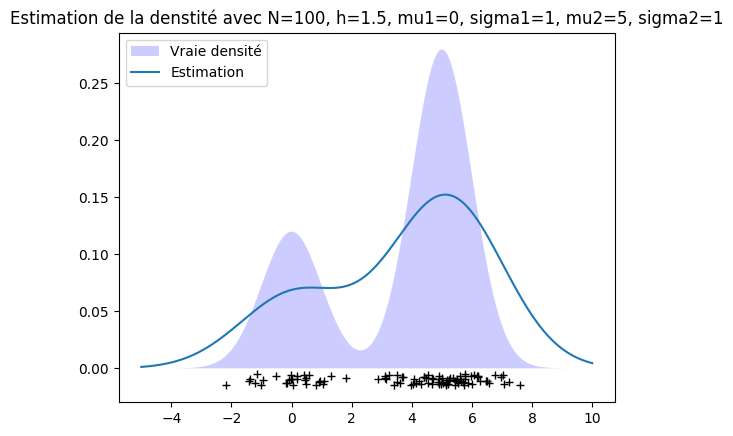

In [297]:
estimationdensite(N=100, h=1.5, mu1=0, sigma1=1, mu2=5, sigma2=1)

> On peut déduire deux points de ces différents affichages :
>
> *   Plus la valeur de h est grande, plus la courbe de l'estimation se lisse. Elle s'approche d'une moyenne de la vraie courbe de densité.
*   Plus la valeur de h est faible, plus la courbe de l'estimation se rapproche de la densité réelle, en laissant des variations plus fortes.



## Question 3

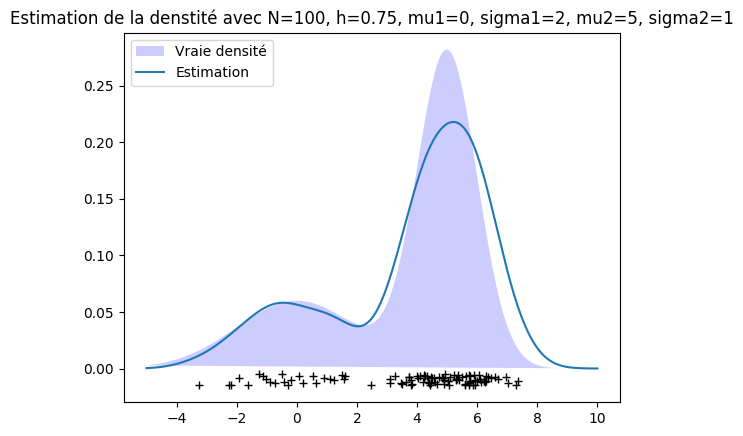

In [286]:
estimationdensite(N=100, h=0.75, mu1=0, sigma1=2, mu2=5, sigma2=1)

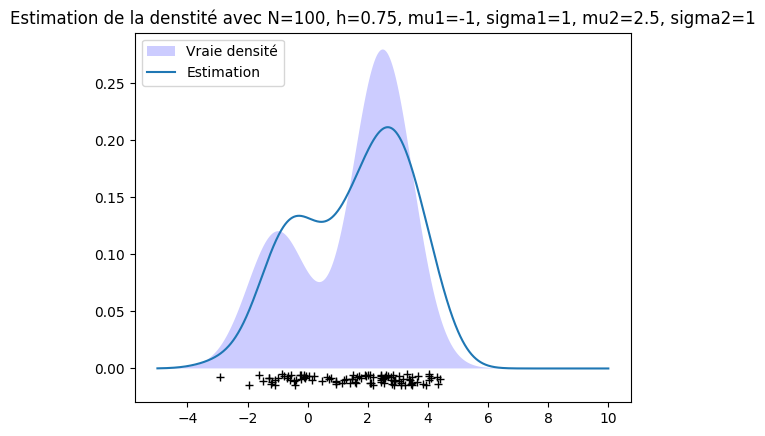

In [287]:
estimationdensite(N=100, h=0.75, mu1=-1, sigma1=1, mu2=2.5, sigma2=1)

> On peut déduire deux points de ces différents affichages :
>
> *   Plus les deux moyennes sont proches, plus l'estimation fait une erreur sur le milieu des deux creux : elle y place trop de valeur par rapport à la quantité réelle.
*   Plus l'une des valeurs de sigma est grande, plus l'estimation aux alentours de l'autre gaussienne est proche. En revanche, l'estimateur ne prends pas suffisament de valeurs aux alentours de cette gausienne et son estimation est trop mauvaises (trop de valeurs sont estimés dans le creux des deux).

## Question 4

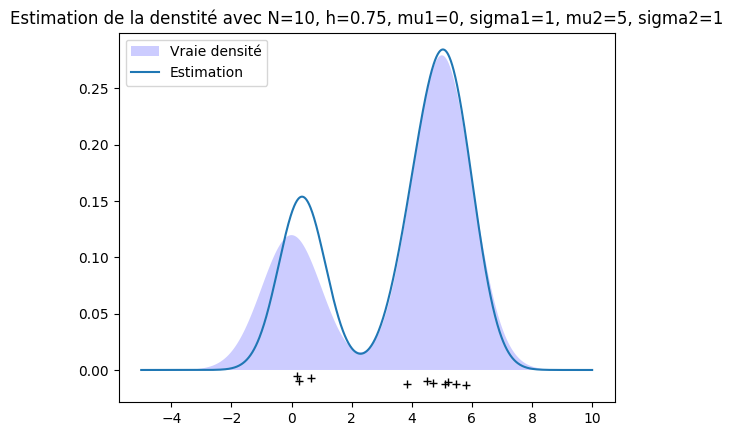

In [288]:
estimationdensite(N=10, h=0.75, mu1=0, sigma1=1, mu2=5, sigma2=1)

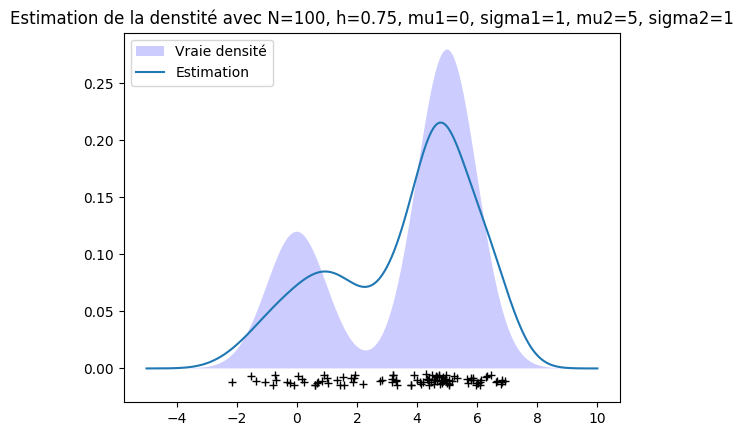

In [289]:
estimationdensite(N=100, h=0.75, mu1=0, sigma1=1, mu2=5, sigma2=1)

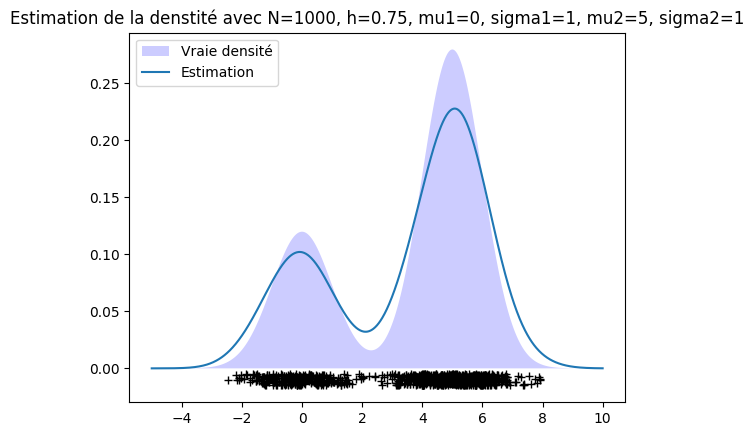

In [290]:
estimationdensite(N=1000, h=0.75, mu1=0, sigma1=1, mu2=5, sigma2=1)

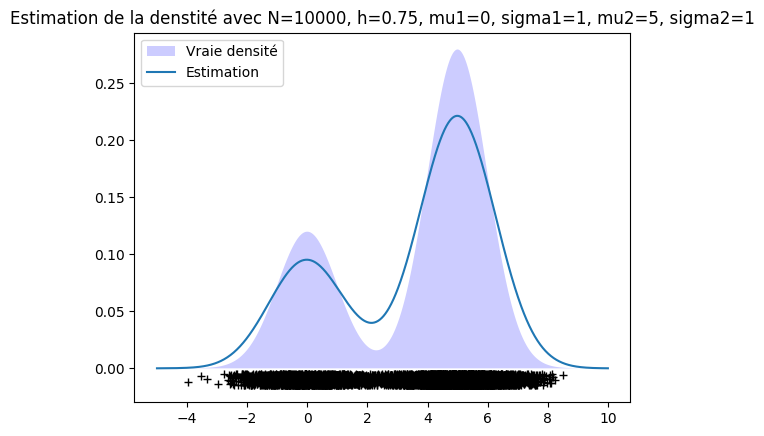

In [291]:
estimationdensite(N=10000, h=0.75, mu1=0, sigma1=1, mu2=5, sigma2=1)

> Une valeur de N trop faible entraine une bien trop mauvaises estimations : de nombreuses valeurs sont estimés la ou il n'y en a presque pas dans l'estimation réelle.
> 
> Prendre une plus grande valeur de N permet d'avoir une meilleur approximation de la densité.

## Question 5

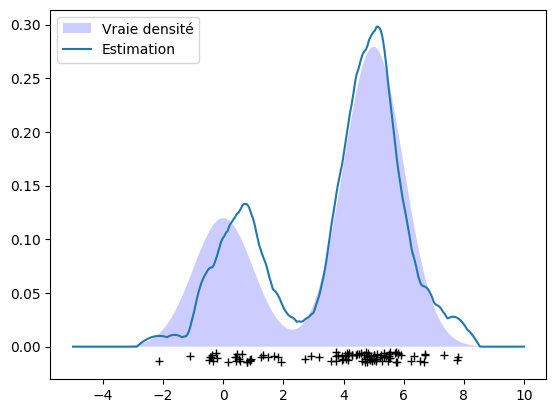

In [292]:
estimationdensite2(N=100, h=0.75, mu1=0, sigma1=1, mu2=5, sigma2=1)

> L'estimation avec le noyau d'Epanechnikov est plutôt bonne : la forme générame est bien respectée même si les maximums sont décalés vers la droite. Là ou la vraie densité est très faible, il y a même une estiamtion nulle. Nous pouvons améliorer l'estimation en augmentant la valeur de N.

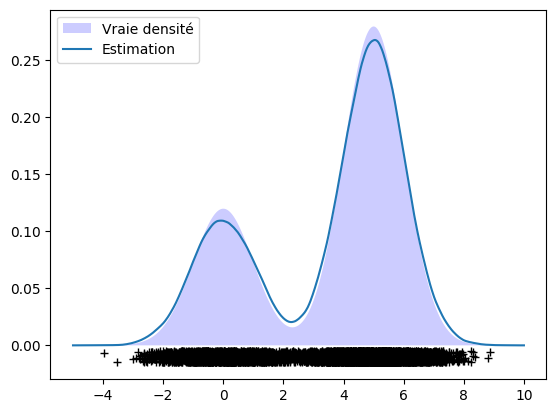

In [293]:
estimationdensite2(N=10000, h=0.75, mu1=0, sigma1=1, mu2=5, sigma2=1)

> En prenant N=10000, nous obtenons une estimation de la densité vraiment très proche de la densité réelle. Ce résultat est bien meilleur que le précédent car l'estimation a une erreur très faible pour une même valeur de N.